Step 1: Upload your dataset zip file to Colab

In [1]:
from google.colab import files

print("Upload your garbage classification dataset zip file")
uploaded = files.upload()


Upload your garbage classification dataset zip file


Saving archive.zip to archive (1).zip


Step 2: Unzip the dataset

In [2]:
import zipfile
import os

zip_path = "archive.zip"  # change if your filename differs

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("dataset")

print("Dataset unzipped to ./dataset/")


Dataset unzipped to ./dataset/


Step 3: Inspect the extracted folder structure

In [3]:
!ls dataset/


'garbage classification'	       one-indexed-files-notrash_val.txt
'Garbage classification'	       one-indexed-files.txt
 one-indexed-files-notrash_test.txt    zero-indexed-files.txt
 one-indexed-files-notrash_train.txt


Step 4: Load dataset using TensorFlow’s utility

In [4]:
import tensorflow as tf

img_height = 180
img_width = 180
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset",
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset",
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

class_names = train_ds.class_names
print("Classes found:", class_names)


Found 5054 files belonging to 2 classes.
Using 4044 files for training.
Found 5054 files belonging to 2 classes.
Using 1010 files for validation.
Classes found: ['Garbage classification', 'garbage classification']


Step 5: Build a lightweight CNN model

In [5]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 59168)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     3,786,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,792,034 (14.47 MB)

 Trainable params: 3,792,034 (14.47 MB)

 Non-trainable params: 0 (0.00 B)

Step 6: Train the model

In [6]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


Epoch 1/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 105s 811ms/step - accuracy: 0.4886 - loss: 1.1259 - val_accuracy: 0.4703 - val_loss: 0.6934
Epoch 2/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 144s 831ms/step - accuracy: 0.5133 - loss: 0.6931 - val_accuracy: 0.4683 - val_loss: 0.6938
Epoch 3/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 142s 831ms/step - accuracy: 0.5105 - loss: 0.6931 - val_accuracy: 0.4673 - val_loss: 0.6941
Epoch 4/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 103s 812ms/step - accuracy: 0.5148 - loss: 0.6929 - val_accuracy: 0.4673 - val_loss: 0.6942
Epoch 5/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 102s 805ms/step - accuracy: 0.5117 - loss: 0.6930 - val_accuracy: 0.4673 - val_loss: 0.6942
Epoch 6/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 102s 805ms/step - accuracy: 0.5135 - loss: 0.6929 - val_accuracy: 0.4653 - val_loss: 0.6944
Epoch 7/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 102s 803ms/step - accuracy: 0.5155 - loss: 0.6929 - val_accuracy: 0.4634 - val_loss: 0.6945
Epoch 8/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 142s 800ms/step - accuracy: 0.5129 -

Step 7: Plot training and validation accuracy

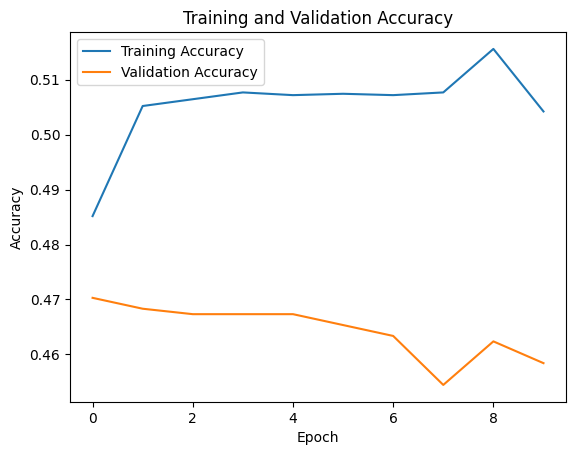

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


Step 8: Convert the trained model to TensorFlow Lite format

In [8]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

tflite_model_path = "recycle_model.tflite"
with open(tflite_model_path, "wb") as f:
    f.write(tflite_model)

print(f"TFLite model saved to {tflite_model_path}")


Saved artifact at '/tmp/tmp28psyoc4'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  138745240982096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138745240982288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138745240983248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138745240982672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138745240983632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138745240981136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138745240980560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138745240984208: TensorSpec(shape=(), dtype=tf.resource, name=None)
TFLite model saved to recycle_model.tflite


Step 9: Run inference with the TFLite model on a sample image

/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


True label: garbage classification
Predicted label by TFLite model: Garbage classification


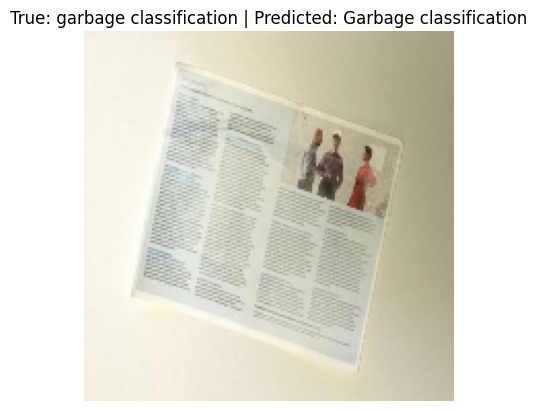

In [9]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Pick a sample image from validation dataset
for images, labels in val_ds.take(1):
    sample_img = images[0].numpy().astype(np.uint8)
    true_label = class_names[labels[0]]

# Preprocess the sample image for TFLite
input_shape = input_details[0]['shape']
input_data = np.expand_dims(sample_img, axis=0).astype(np.float32) / 255.0

interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()

output_data = interpreter.get_tensor(output_details[0]['index'])
predicted_label = class_names[np.argmax(output_data)]

print(f"True label: {true_label}")
print(f"Predicted label by TFLite model: {predicted_label}")

# Show the image
plt.imshow(sample_img)
plt.title(f"True: {true_label} | Predicted: {predicted_label}")
plt.axis('off')
plt.show()
